In [47]:
import pandas as pd
import numpy as np
from pandas import DataFrame as DF
!pip3 install xgboost
!pip3 install scikit-learn

df = pd.read_csv("train.csv", sep = ";")
p_df = DF()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 1.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 529.1 kB/s eta 0:00:00a 0:00:01


In [48]:
df

,ID,Категория,Заголовок,Опции продажи,Тип,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Кол-во этажей в доме,...,Кол-во совмещенных санузлов,Ремонт,Вид из окон,Расстояние до метро,Адрес,Описания,Стоимость,Актуальность,Изображения,Регион
0,16592911,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 70.03 м2",Возможна ипотека,Новостройка,70.03,41.8,13.7,2,17,...,NaN,NaN,NaN,12 мин. на транспорте,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Продается просторная двухкомнатная квартира 70...,7073030,Опубликовано,https://cdn-p.cian.site/images/3/824/736/novos...,Москва
1,17242255,Недвижимость в Москве/Продажа/Продажа 3-комнат...,"3-комн. квартира, 76.47 м2",Возможна ипотека,Новостройка,76.47,43.4,11.2,11,17,...,NaN,NaN,Во двор,12 мин. на транспорте,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...","Продается трехкомнатная квартира 76,47 кв.м с ...",7799940,Опубликовано,https://cdn-p.cian.site/images2/5/690/176/novo...,Москва
2,193433104,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 60.0 м2",NaN,Новостройка,60.00,38.0,12.0,5,20,...,NaN,NaN,На улицу и двор,3 мин. на транспорте,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",Дом сдан. Есть возможность перепланировать в 3...,11700000,Опубликовано,https://cdn-p.cian.site/images/5/002/116/novos...,Москва
3,140334219,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 65.2 м2",Возможна ипотека,Новостройка,65.20,0.0,0.0,2,5,...,NaN,NaN,На улицу и двор,NaN,"Московская область,Красногорск городской округ...",Дом построен. Получена собственность. Фактичес...,6055000,Опубликовано,https://cdn-p.cian.site/images/4/379/115/novos...,Красногорск
4,189844059,Недвижимость в Москве/Продажа/Продажа 1-комнат...,"1-комн. квартира, 38.18 м2",Возможна ипотека,Новостройка,38.18,17.3,8.1,1,3,...,NaN,NaN,Во двор,33 мин. на транспорте,"Московская область,Истра городской округ,д. Ло...",Внимание! Вашему вниманию предлагается 1к квар...,2710780,Опубликовано,https://cdn-p.cian.site/images/7/107/141/novos...,Истра
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29039,45196829,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 62.5 м2",Возможна ипотека,Новостройка,62.50,34.0,9.6,3,3,...,NaN,NaN,На улицу и двор,NaN,"Московская область,Истра городской округ,д. Ло...",Внимание!!! Готовая квартира с собственностью!...,4312500,Опубликовано,https://cdn-p.cian.site/images/7/529/525/novos...,Истра
29040,45106834,Недвижимость в Москве/Продажа/Продажа 3-комнат...,"3-комн. квартира, 80.4 м2",Возможна ипотека,Новостройка,80.40,40.8,12.3,3,3,...,NaN,NaN,На улицу и двор,23 мин. на транспорте,"Московская область,Истра городской округ,д. Ло...",Внимание!!! Выгодная цена на квартиру от инвес...,5102860,Опубликовано,https://cdn-p.cian.site/images/614/388/novostr...,Истра
29041,45126834,Недвижимость в Москве/Продажа/Продажа 3-комнат...,"3-комн. квартира, 84.0 м2",Возможна ипотека,Новостройка,84.00,45.0,12.5,3,3,...,NaN,NaN,На улицу и двор,NaN,"Московская область,Истра городской округ,д. Ис...","Внимание!!! Готовая квартира от инвестора, с с...",5376000,Опубликовано,https://cdn-p.cian.site/images/714/388/novostr...,Истра
29042,51690490,Недвижимость в Балашихе/Продажа/Продажа 3-комн...,"3-комн. квартира, 104.9 м2",Свободная продажа,Новостройка,104.90,60.0,0.0,10,20,...,NaN,Без ремонта,На улицу и двор,NaN,"Московская область,Балашиха,улица Чистопольска...",Продам квартиру свободной планировки или обмен...,7000000,Опубликовано,https://cdn-p.cian.site/images/0/230/201/novos...,Балашихинский


In [50]:
def data_transfer(df: DF(), column: str, nan_value, value_type: type):
    arr = []
    for i in range(len(df)):
        try:
            if value_type == int:
                arr.append(int(df[column][i]))
            elif value_type == str:
                value = str(df[column][i])
                if value == "nan":
                    value = nan_value
                arr.append(value)
                
                
        except:
            arr.append(nan_value)
    return arr

In [51]:
создаем дата сет, на котором обучали наши модели

SyntaxError: invalid syntax (1537264889.py, line 1)

In [52]:
def create_primary_df(df: DF) -> DF:
    primary_df = DF()
    primary_df["Регион"] = df["Регион"]
    primary_df["Район"] = [df["Адрес"][i].split(",")[1] for i in range(len(df))]
    primary_df["Актуальность"] = df["Актуальность"]
    
    try:
        primary_df["Стоимость"] = df["Стоимость"]
    except:
        print("[INFO] Стоимость не добавлена")
    
    primary_df["Кол-во комнат"] = data_transfer(df, "Количество комнат", 0, int)
    primary_df["Название ЖК"] = data_transfer(df, "Название дома (ЖК)", "Нет", str)
    primary_df["Тип"] = df["Тип"]
    primary_df["Общая площадь"] = df["Общая площадь"]
    primary_df["Парковка"] = data_transfer(df, "Парковка", "отсутствует", str)
    primary_df["Этаж"] = df["Этаж"]
    
    return primary_df


In [53]:
p_df = create_primary_df(df)

In [54]:
p_df

,Регион,Район,Актуальность,Стоимость,Кол-во комнат,Название ЖК,Тип,Общая площадь,Парковка,Этаж
0,Москва,НАО (Новомосковский),Опубликовано,7073030,2,ЖК «Белая звезда»,Новостройка,70.03,подземная,2
1,Москва,НАО (Новомосковский),Опубликовано,7799940,3,ЖК «Белая звезда»,Новостройка,76.47,подземная,11
2,Москва,СЗАО,Опубликовано,11700000,2,ЖК «Хорошевский»,Новостройка,60.00,отсутствует,5
3,Красногорск,Красногорск городской округ,Опубликовано,6055000,2,ЖК «Рублевское предместье»,Новостройка,65.20,подземная,2
4,Истра,Истра городской округ,Опубликовано,2710780,1,ЖК «Павловский квартал»,Новостройка,38.18,отсутствует,1
...,...,...,...,...,...,...,...,...,...,...
29039,Истра,Истра городской округ,Опубликовано,4312500,2,ЖК «Павловский квартал»,Новостройка,62.50,отсутствует,3
29040,Истра,Истра городской округ,Опубликовано,5102860,3,ЖК «Павловский квартал»,Новостройка,80.40,отсутствует,3
29041,Истра,Истра городской округ,Опубликовано,5376000,3,ЖК «Павловский квартал»,Новостройка,84.00,отсутствует,3
29042,Балашихинский,Балашиха,Опубликовано,7000000,3,ЖК «Эдельвейс-Комфорт»,Новостройка,104.90,отсутствует,10


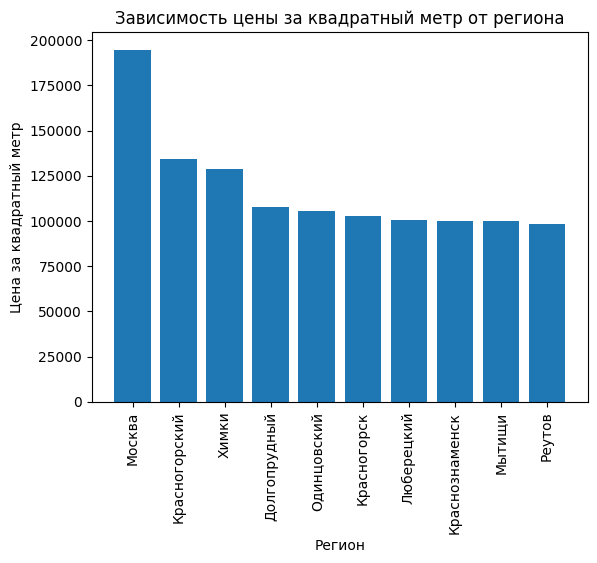

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

price_per_sqm = p_df['Стоимость'] / p_df['Общая площадь']
region_prices = p_df.groupby('Регион')['Стоимость'].sum() / p_df.groupby('Регион')['Общая площадь'].sum()
sorted_region_prices = region_prices.sort_values(ascending=False)[:10]

plt.bar(sorted_region_prices.index, sorted_region_prices)
plt.xlabel('Регион')
plt.ylabel('Цена за квадратный метр')
plt.title('Зависимость цены за квадратный метр от региона')
plt.xticks(rotation=90)
plt.show()

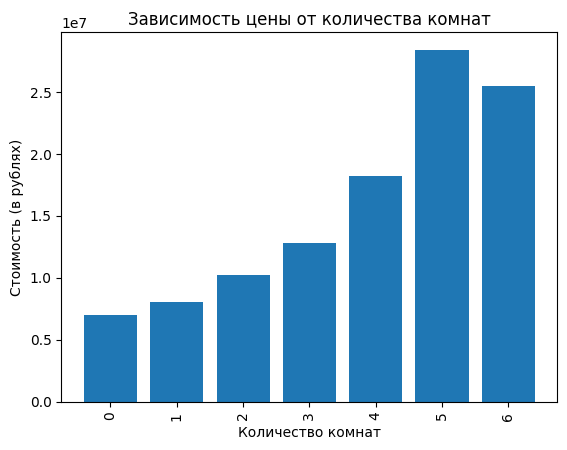

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

room_prices = p_df.groupby('Кол-во комнат')['Стоимость'].mean()
sorted_room_prices = room_prices.sort_values(ascending=False)[:10]

plt.bar(sorted_room_prices.index, sorted_room_prices)
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость (в рублях)')
plt.title('Зависимость цены от количества комнат')
plt.xticks(rotation=90)
plt.show()

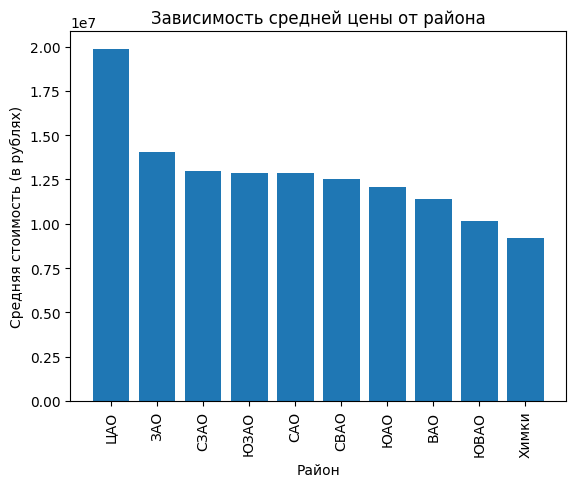

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

district_prices = p_df.groupby('Район')['Стоимость'].mean()
sorted_district_prices = district_prices.sort_values(ascending=False)[:10]

plt.bar(sorted_district_prices.index, sorted_district_prices)
plt.xlabel('Район')
plt.ylabel('Средняя стоимость (в рублях)')
plt.title('Зависимость средней цены от района')
plt.xticks(rotation=90)
plt.show()

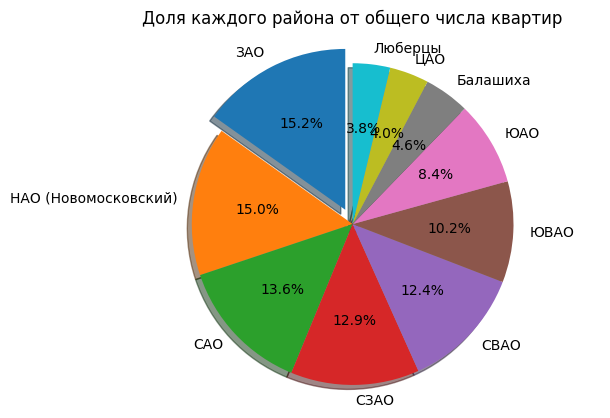

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

district_counts = p_df['Район'].value_counts()
sorted_district_counts = district_counts.sort_values(ascending=False)[:10]

labels = sorted_district_counts.index.tolist()

sizes = sorted_district_counts.values.tolist()

explode = [0.1] + [0] * (len(labels) - 1)  

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  
plt.title('Доля каждого района от общего числа квартир')
plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoded_df = pd.get_dummies(p_df, columns=['Тип'])
encoded_df['Парковка'] = encoder.fit_transform(encoded_df['Парковка'])
encoded_df['Регион'] = encoder.fit_transform(encoded_df['Регион'])
encoded_df['Район'] = encoder.fit_transform(encoded_df['Район'])
encoded_df['Название ЖК'] = encoder.fit_transform(encoded_df['Название ЖК'])
encoded_df['Актуальность'] = encoder.fit_transform(encoded_df['Актуальность'])

In [62]:
encoded_df

,Регион,Район,Актуальность,Стоимость,Кол-во комнат,Название ЖК,Общая площадь,Парковка,Этаж,Тип_Вторичка,Тип_Новостройка
0,32,42,2,7073030,2,108,70.03,3,2,False,True
1,32,42,2,7799940,3,108,76.47,3,11,False,True
2,32,63,2,11700000,2,529,60.00,2,5,False,True
3,22,30,2,6055000,2,450,65.20,3,2,False,True
4,16,23,2,2710780,1,394,38.18,2,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...
29039,16,23,2,4312500,2,394,62.50,2,3,False,True
29040,16,23,2,5102860,3,394,80.40,2,3,False,True
29041,16,23,2,5376000,3,394,84.00,2,3,False,True
29042,1,0,2,7000000,3,543,104.90,2,10,False,True


linear regression

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error

features = encoded_df.drop('Стоимость', axis=1)
target = encoded_df['Стоимость']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

y_pred = linear_reg.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 4063225.4339280673


knn

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

features = encoded_df.drop("Стоимость", axis=1)
target = encoded_df["Стоимость"].values

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE:", rmsle)



RMSLE: 0.1907009718947283


gradient boosting 

In [67]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X = encoded_df.drop("Стоимость", axis=1)
y = encoded_df["Стоимость"].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmsle"
}

model = xgb.train(params, dtrain)

y_pred = model.predict(dtest)

rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE:", rmsle)



RMSLE: 0.18558027378228312


In [68]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

test_df = pd.read_csv("test.csv", sep=";")

X = create_primary_df(test_df)

encoder = LabelEncoder()
X = pd.get_dummies(X, columns=['Тип'])
categorical_columns = ['Парковка', 'Регион', 'Район', 'Название ЖК', 'Актуальность']

for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])
    
X = scaler.transform(X)

X = xgb.DMatrix(X)

y_pred = model.predict(X)

pred_df = pd.DataFrame({"ID": test_df["ID"], "Стоимость": [int(i) for i in list(y_pred)]})

pred_df.to_csv('gleb_ne_pa.csv', sep=';', encoding='utf-8', index=False)


[INFO] Стоимость не добавлена
